In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leaf-classification/train.csv.zip
/kaggle/input/leaf-classification/test.csv.zip
/kaggle/input/leaf-classification/sample_submission.csv.zip
/kaggle/input/leaf-classification/images.zip


**Plotting Libraries**

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

In [5]:
train = pd.read_csv('/kaggle/input/leaf-classification/train.csv.zip')
test = pd.read_csv('/kaggle/input/leaf-classification/test.csv.zip')

**Preprocessing the data**

In [6]:
def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           
    classes = list(le.classes_)                    
    test_ids = test.id                             
    
    train = train.drop(['species', 'id'], axis=1)  
    test = test.drop(['id'], axis=1)
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)
train.head(1)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.0,0.00293,0.00293,0.035156,0.0,0.0,0.004883,0.0,0.025391


**Libraries for splitting**

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
s = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
s.get_n_splits(train, labels)

for train_index, test_index in s.split(train, labels):   
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

**Sklearn Classifier Showdown**

Simply looping through 10 out-of-the box classifiers and printing the results.

In [11]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 87.8788%
Log Loss: 2.2502083078831476
SVC
****Results****
Accuracy: 84.3434%
Log Loss: 4.6300183000676345
NuSVC
****Results****
Accuracy: 90.4040%
Log Loss: 2.384069812681923
DecisionTreeClassifier
****Results****
Accuracy: 69.6970%
Log Loss: 10.466295877245761
RandomForestClassifier
****Results****
Accuracy: 97.9798%
Log Loss: 0.7649514336664133
AdaBoostClassifier
****Results****
Accuracy: 3.0303%
Log Loss: 4.290979467326813
GradientBoostingClassifier
****Results****
Accuracy: 64.6465%
Log Loss: 3.5140607230592176
GaussianNB
****Results****
Accuracy: 55.0505%
Log Loss: 15.506623400535767
LinearDiscriminantAnalysis
****Results****
Accuracy: 97.4747%
Log Loss: 0.5108204944709152
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 1.0101%
Log Loss: 34.189899865669254


**Plotting the values**

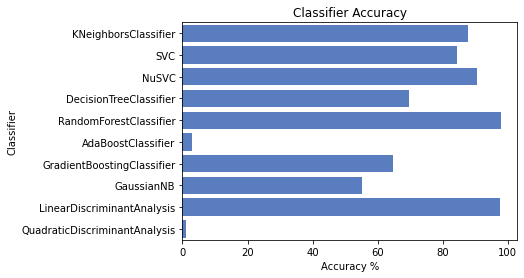

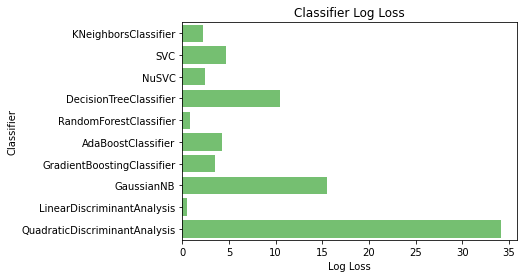

In [12]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()